#### Problem Statement:

##### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# import required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [17]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Eve\Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### EDA(Exploratory Data Analysis)

In [18]:
# checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [19]:
# Checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [20]:
# Checking shape of data
df.shape

(1000, 40)

In this dataset 1000 rows and 40 columns

In [21]:
# checking null/missing value
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are missing value in one column.

In [22]:
df.drop(["_c39"],axis=1,inplace=True)

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [24]:
# Now again checking missing value
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now There is no any missing value in our dataset

<AxesSubplot:>

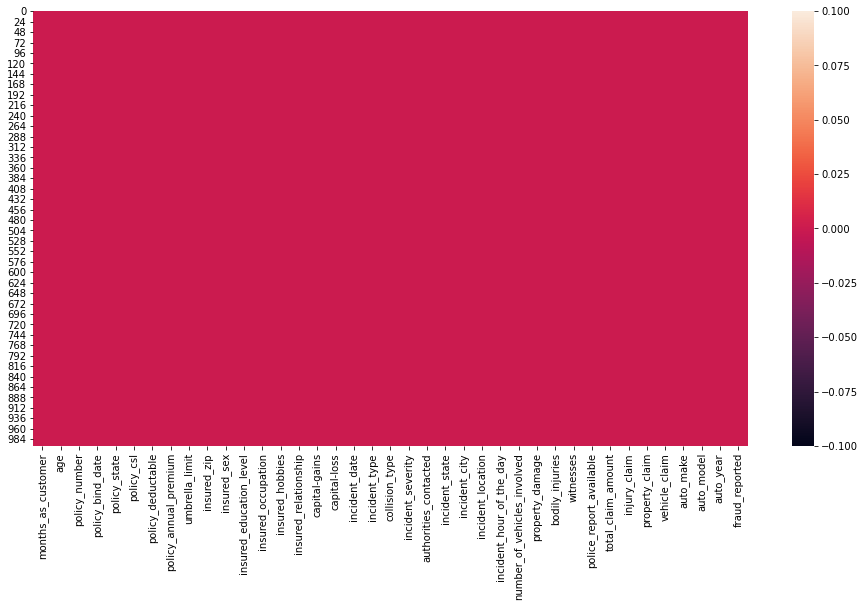

In [26]:
#checking missing using heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

Now There is no any missing value in our dataset

In [28]:
df = df.replace('?',np.NaN)

In [29]:
df = df.dropna()

In [30]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
11,447,61,214618,29-05-1999,OH,100/300,2000,1137.16,0,615561,FEMALE,High School,exec-managerial,skydiving,other-relative,0,-51000,15-02-2015,Multi-vehicle Collision,Front Collision,Major Damage,Fire,SC,Springfield,5971 5th Hwy,21,3,YES,1,2,YES,114920,17680,17680,79560,Audi,A3,2006,N


In [33]:
# checking data type
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

float 1,object 21,int 17

In [37]:
# encoding categrocial column into integer.using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['policy_bind_date'] = le.fit_transform(df['policy_bind_date'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['policy_csl'] = le.fit_transform(df['policy_csl'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation']= le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_date'] = le.fit_transform(df['incident_date'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [38]:
# Now checking data type
df.dtypes


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day 

In [39]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,194,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,1,2,0,3,4,1,339,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
2,134,29,687698,62,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,1,1,3,1,1,220,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
5,256,39,104594,134,2,1,1000,1351.10,0,478456,0,6,12,3,4,0,0,3,0,1,0,1,4,0,292,19,3,0,0,2,0,64100,6410,6410,51280,10,3,2003,1
8,27,33,485665,46,0,0,500,1442.99,0,601734,0,6,7,9,3,0,0,58,1,0,2,3,6,0,141,21,1,0,1,1,1,27700,2770,2770,22160,12,9,2012,0
11,447,61,214618,317,2,0,2000,1137.16,0,615561,0,2,3,16,2,0,-51000,30,0,0,0,1,4,6,182,21,3,1,1,2,1,114920,17680,17680,79560,1,4,2006,0


In [40]:
# Statical summary
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.00000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,211.623529,39.408824,554678.044118,168.226471,1.079412,0.920588,1161.764706,1270.981529,9.411765e+05,501608.923529,0.482353,3.064706,6.691176,9.444118,2.352941,26247.352941,-26963.529412,29.461765,0.511765,1.044118,1.05000,1.479412,3.138235,3.076471,169.500000,13.197059,1.994118,0.476471,1.017647,1.464706,0.452941,62868.235294,8886.205882,8769.852941,45212.176471,6.235294,18.782353,2004.629412,0.255882
std,112.779915,9.309204,266669.876966,97.461036,0.835877,0.803488,612.319304,245.008304,2.099883e+06,71966.015133,0.500425,1.905261,3.989135,5.624414,1.682503,28165.152825,28322.980640,16.690529,0.500598,0.802537,0.80586,1.103569,2.130342,2.024927,98.293777,6.718485,1.053143,0.500182,0.812684,1.103195,0.498514,16361.337381,4143.660334,4003.652423,11470.884470,4.032748,11.378173,6.009654,0.436999
min,1.000000,20.000000,100804.000000,0.000000,0.000000,0.000000,500.000000,538.170000,0.000000e+00,430232.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93600.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,27700.000000,0.000000,0.000000,19670.000000,0.000000,0.000000,1995.000000,0.000000
25%,123.750000,32.000000,337547.250000,83.750000,0.000000,0.000000,500.000000,1101.765000,0.000000e+00,447534.500000,0.000000,1.750000,3.000000,4.000000,1.000000,0.000000,-52050.000000,15.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,84.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,52157.500000,5747.500000,5857.500000,37152.500000,3.000000,8.750000,1999.000000,0.000000
50%,204.500000,39.000000,533135.500000,168.500000,1.000000,1.000000,1000.000000,1274.665000,0.000000e+00,466207.500000,0.000000,3.000000,7.000000,9.000000,2.000000,11900.000000,-21650.000000,29.000000,1.000000,1.000000,1.00000,1.000000,4.000000,3.000000,169.500000,14.000000,1.000000,0.000000,1.000000,2.000000,0.000000,61380.000000,7690.000000,7560.000000,44615.000000,6.000000,20.000000,2005.000000,0.000000
75%,289.000000,45.250000,794964.250000,252.250000,2.000000,2.000000,2000.000000,1437.467500,0.000000e+00,603018.500000,1.000000,5.000000,10.000000,15.000000,4.000000,53025.000000,0.000000,44.000000,1.000000,2.000000,2.00000,2.000000,5.000000,5.000000,254.250000,18.000000,3.000000,1.000000,2.000000,2.000000,1.000000,73810.000000,12105.000000,11510.000000,53860.000000,10.000000,29.000000,2010.000000,1.000000
max,479.000000,64.000000,996850.000000,335.000000,2.000000,2.000000,2000.000000,1969.630000,1.000000e+07,620869.000000,1.000000,6.000000,13.000000,19.000000,5.000000,94800.000000,0.000000,59.000000,1.000000,2.000000,2.00000,3.000000,6.000000,6.000000,339.000000,23.000000,4.000000,1.000000,2.000000,3.000000,1.000000,114920.000000,21330.000000,21580.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [41]:
# correlation
corr = df.corr()

In [42]:
corr

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.948106,0.018708,-0.021057,-0.012292,-0.041673,0.055476,-0.029872,-0.076510,-0.039929,0.055128,-0.067662,-0.023693,-0.113410,0.068373,0.007731,0.028531,-0.056181,-0.003004,-0.119329,-0.048088,-0.027603,0.032287,0.034963,0.016485,0.034657,0.001372,-0.011244,0.003291,0.016726,-0.087360,0.102402,0.112963,0.059356,0.084537,0.013900,0.012786,0.010766,0.005492
age,0.948106,1.000000,0.032417,-0.043647,-0.038303,-0.064268,0.053310,-0.019726,-0.090816,-0.044295,0.065191,-0.056546,-0.007949,-0.074127,0.075511,-0.025867,0.018863,-0.061858,0.003079,-0.133114,-0.051098,-0.032630,0.016925,0.027913,0.027452,0.064314,-0.000958,-0.009648,-0.020842,0.020510,-0.065445,0.091621,0.112108,0.036183,0.077557,0.019431,0.029416,0.000396,-0.030866
policy_number,0.018708,0.032417,1.000000,0.061225,0.057217,0.027664,-0.024442,0.081936,-0.026299,0.057287,0.042693,-0.023220,0.009576,0.021736,0.009178,-0.029474,-0.070648,0.037222,0.014955,-0.024489,-0.030486,0.057048,-0.039154,-0.053430,0.093469,-0.054411,-0.023326,-0.041029,0.022052,0.063691,0.006378,0.023322,-0.005520,0.051863,0.017157,-0.005005,0.075780,0.095868,-0.001114
policy_bind_date,-0.021057,-0.043647,0.061225,1.000000,0.052826,0.049238,0.031118,-0.042764,-0.055716,-0.024069,0.056664,0.024846,0.075842,0.069682,0.015935,-0.033361,-0.032809,0.012784,0.065214,0.001380,-0.087281,-0.080385,0.004651,0.106814,0.030074,-0.034460,-0.097846,0.027370,-0.034650,-0.103290,0.089197,0.084555,0.057379,0.084046,0.070542,0.059344,-0.042605,0.027506,0.044486
policy_state,-0.012292,-0.038303,0.057217,0.052826,1.000000,-0.030112,0.015171,-0.001229,0.012753,0.037965,-0.000166,-0.031020,0.002069,-0.092857,-0.045158,0.115829,-0.031273,0.048744,0.050633,-0.009635,-0.062842,-0.025404,-0.036001,-0.048911,0.041307,0.048157,-0.066487,-0.055490,0.019643,0.081422,-0.079495,-0.055309,-0.079485,0.007478,-0.052787,-0.081693,0.055480,-0.051673,0.121871
policy_csl,-0.041673,-0.064268,0.027664,0.049238,-0.030112,1.000000,-0.048760,0.001410,-0.011518,-0.087683,0.051527,0.038051,0.044785,0.011091,-0.046850,0.062969,-0.052784,-0.002977,0.035332,0.042046,0.074487,0.046389,0.030559,0.069014,-0.055857,0.080503,-0.042386,-0.023013,-0.033988,0.101657,0.023783,0.065545,-0.046331,0.085487,0.080388,-0.040646,0.002944,0.069028,0.049641
policy_deductable,0.055476,0.053310,-0.024442,0.031118,0.015171,-0.048760,1.000000,-0.039364,-0.039608,0.008463,-0.101365,-0.012791,0.011455,0.012054,-0.101394,0.103114,-0.057373,0.003060,-0.083215,-0.116614,0.007473,0.013674,0.068739,-0.109928,-0.063127,0.004418,0.086107,0.026912,-0.079852,0.065246,0.034676,0.125091,0.092107,0.173811,0.084485,-0.011876,-0.020336,0.056020,0.004701
policy_annual_premium,-0.029872,-0.019726,0.081936,-0.042764,-0.001229,0.001410,-0.039364,1.000000,-0.024684,0.105388,0.025849,-0.079682,0.050769,0.009756,-0.054702,-0.034156,0.002928,0.093507,-0.016847,-0.014466,-0.094286,-0.124196,0.006740,0.043740,0.020224,0.040495,0.002053,0.060595,0.073005,-0.031110,0.036351,0.016437,-0.066527,0.025526,0.038567,0.031316,-0.040416,-0.003328,0.130862
umbrella_limit,-0.076510,-0.090816,-0.026299,-0.055716,0.012753,-0.011518,-0.039608,-0.024684,1.000000,0.006366,0.108488,-0.075726,0.044309,0.069155,0.040126,-0.062238,-0.024852,0.026953,0.003466,0.024300,-0.013946,-0.048896,0.030837,0.053091,-0.021323,-0.022385,0.011848,-0.085577,0.126795,0.005468,-0.044921,-0.057825,

<AxesSubplot:>

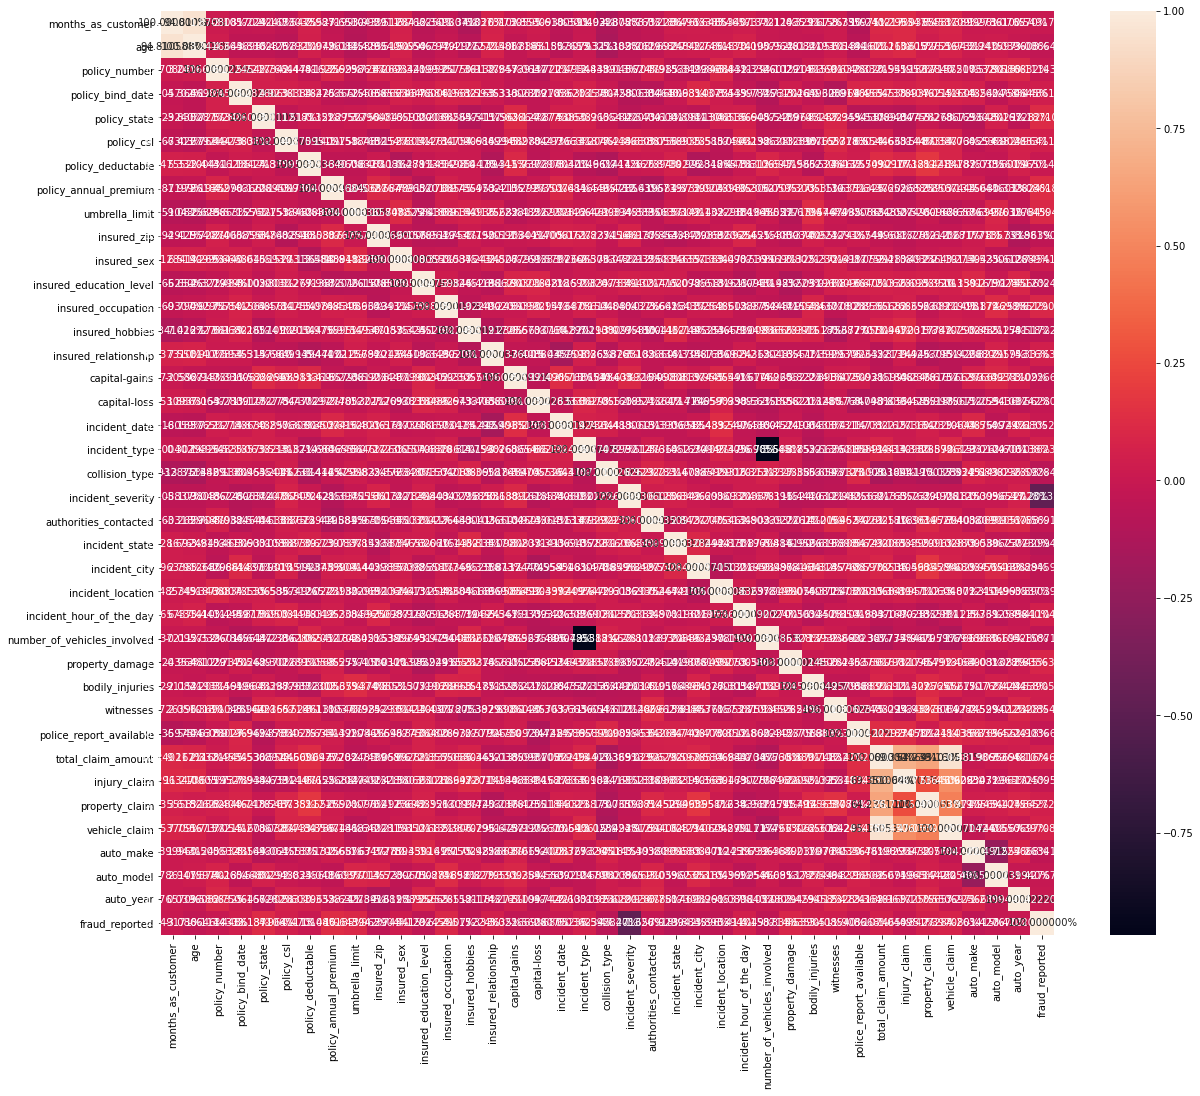

In [50]:
plt.figure(figsize=(20,17))
sns.heatmap(corr,annot=True,fmt='0%',cbar='cool')

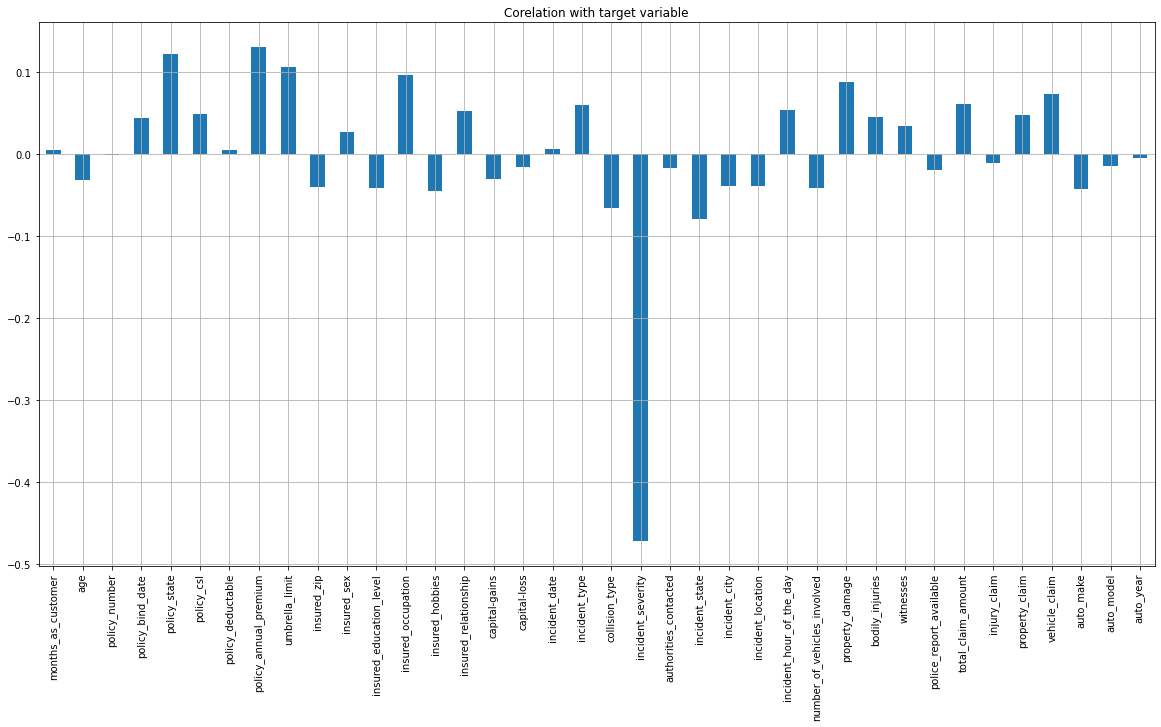

In [52]:
plt.figure(figsize=(20,10))
df.drop('fraud_reported',axis=1).corrwith(df['fraud_reported']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('Corelation with target variable')
plt.show()

Incident_severity is high correlation

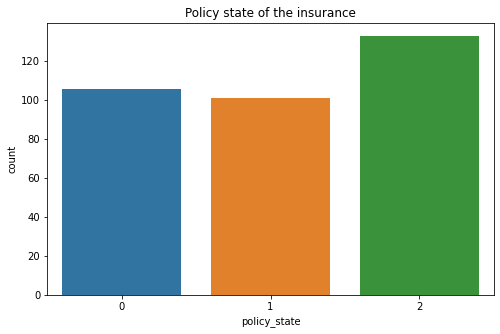

In [54]:
plt.subplots(figsize=(8,5))
sns.countplot(x='policy_state',data=df)
plt.title('Policy state of the insurance')
plt.show()

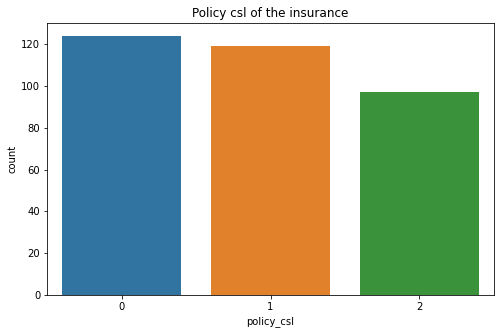

In [55]:
plt.subplots(figsize=(8,5))
sns.countplot(x="policy_csl",data=df)
plt.title("Policy csl of the insurance")
plt.show()

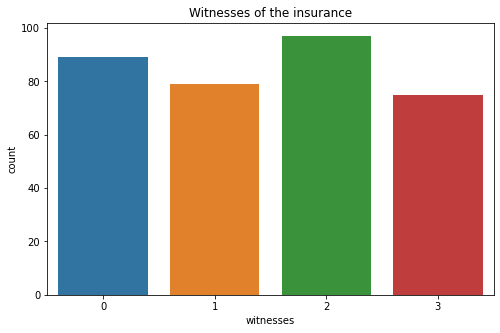

In [56]:
plt.subplots(figsize=(8,5))
sns.countplot(x="witnesses",data=df)
plt.title("Witnesses of the insurance")
plt.show()

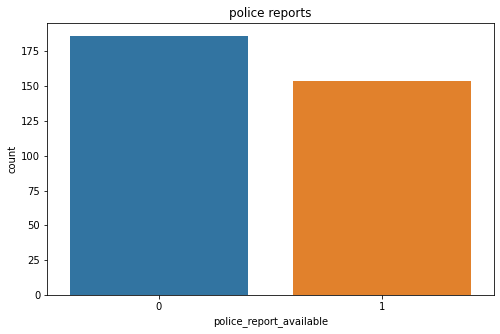

In [57]:
plt.subplots(figsize=(8,5))
sns.countplot(x="police_report_available",data=df)
plt.title("police reports")
plt.show()

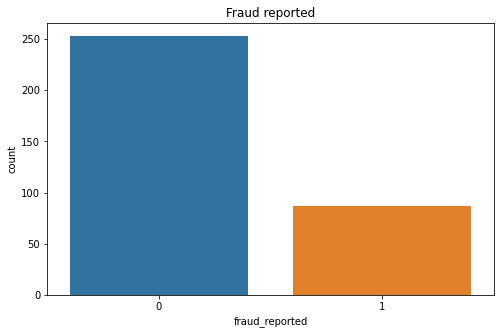

In [58]:
plt.subplots(figsize=(8,5))
sns.countplot(x="fraud_reported",data=df)
plt.title("Fraud reported")
plt.show()

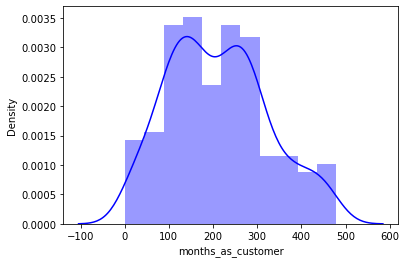

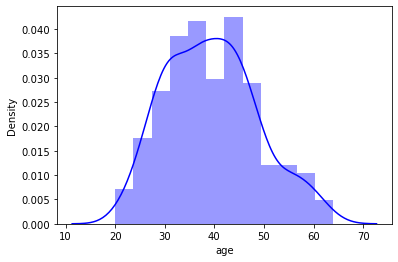

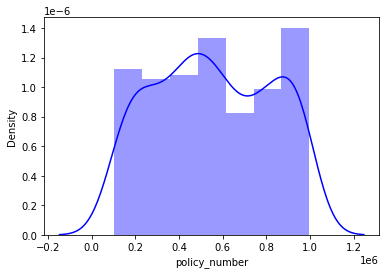

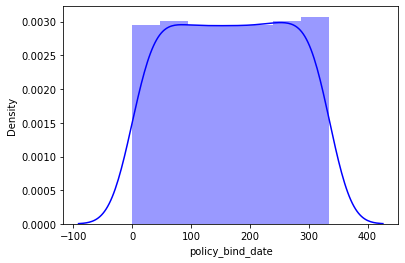

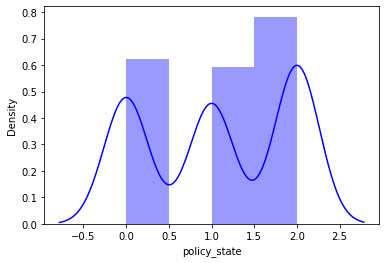

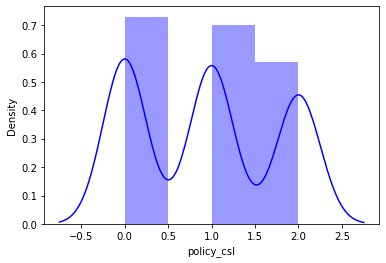

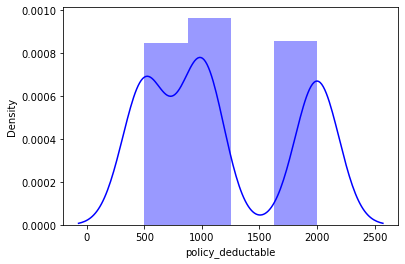

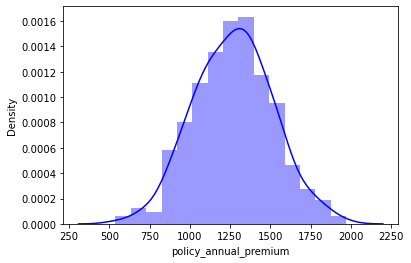

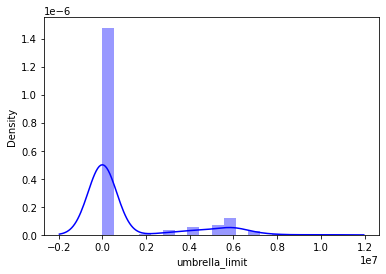

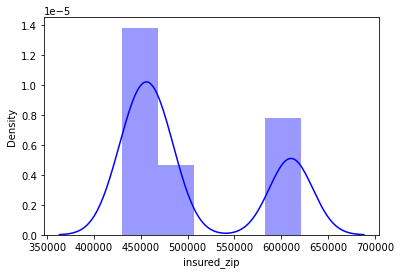

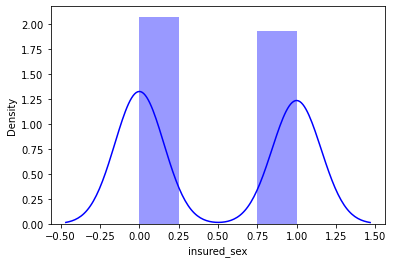

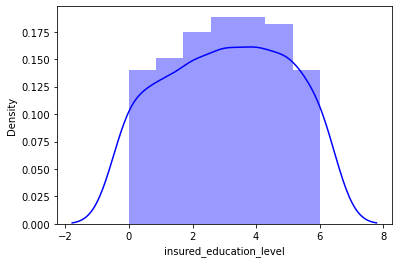

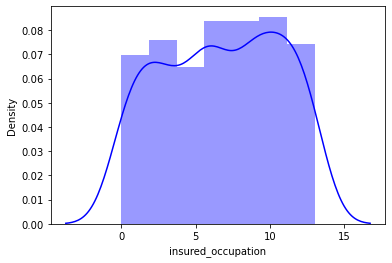

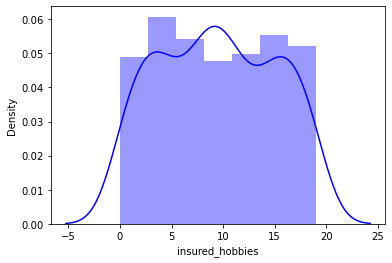

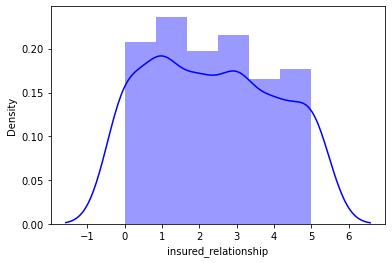

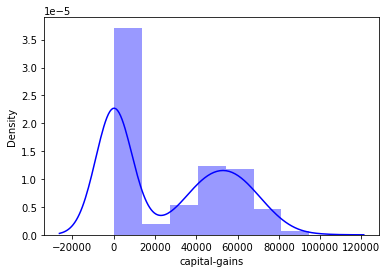

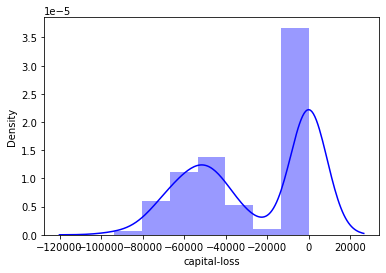

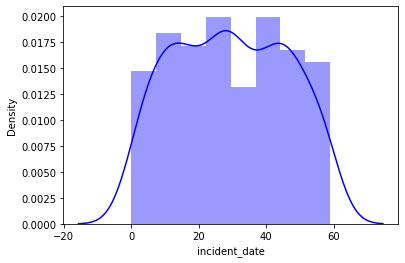

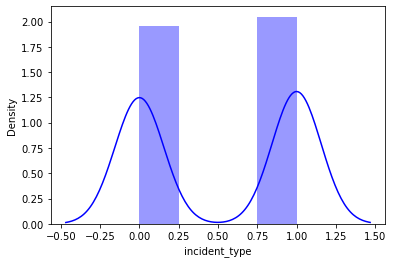

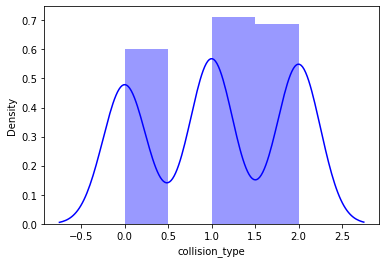

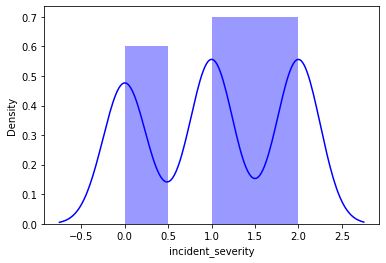

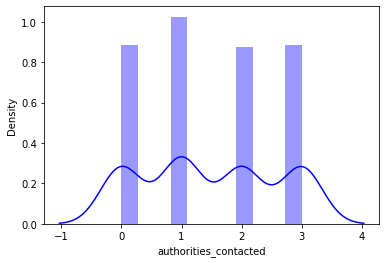

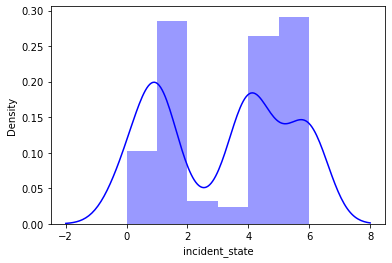

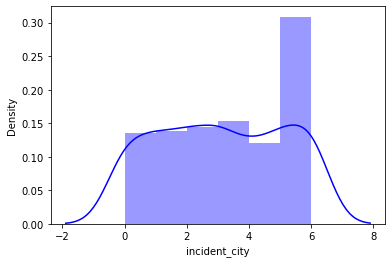

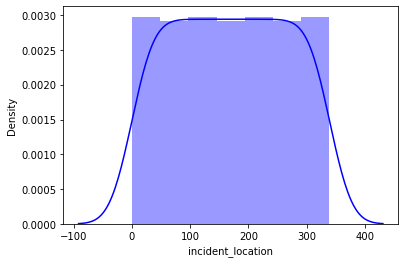

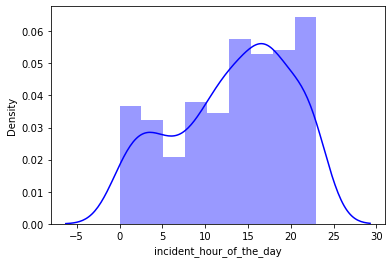

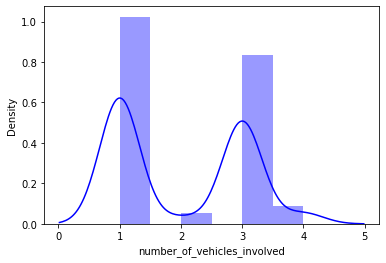

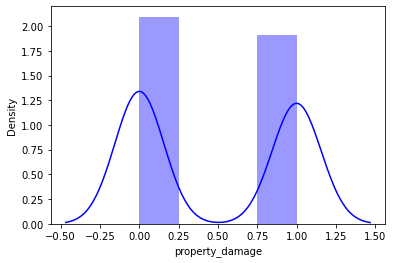

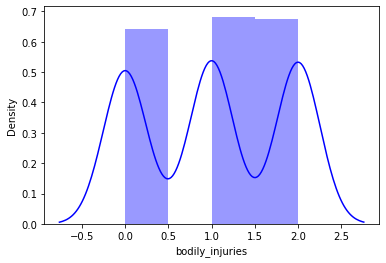

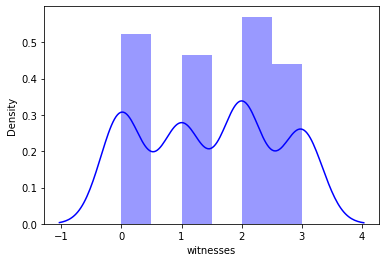

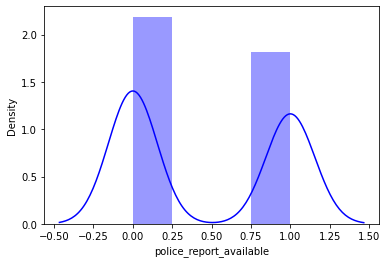

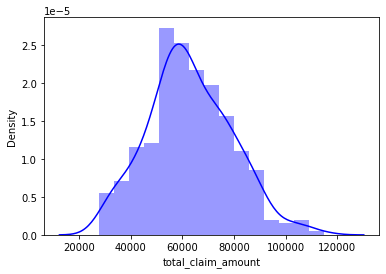

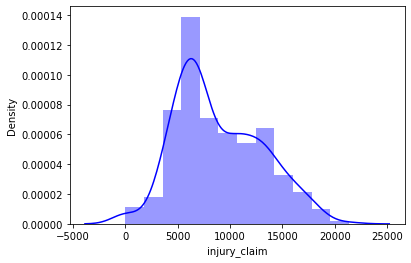

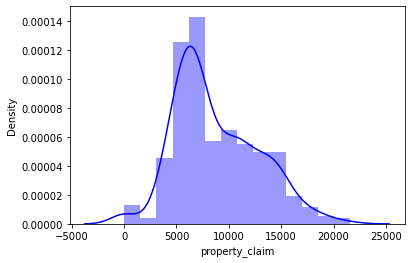

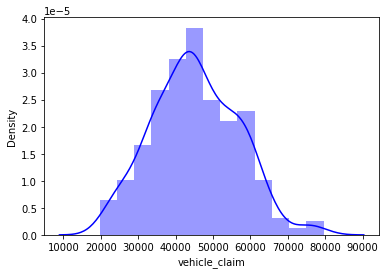

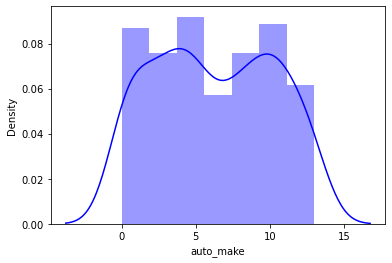

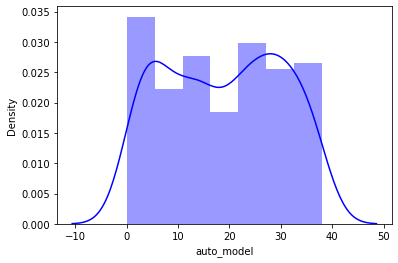

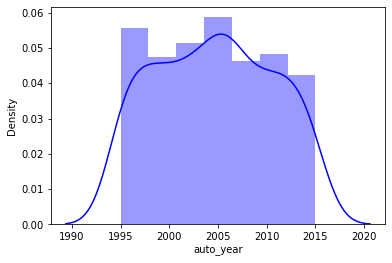

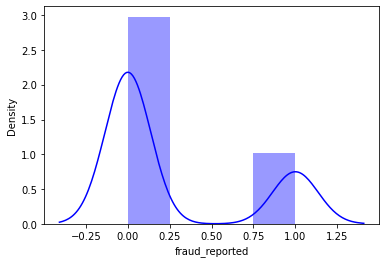

In [59]:
# checking skewness
for col in df.describe().columns:
    sns.distplot(df[col],color='b')
    plt.show()

In [61]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<0.55:
            df[col]=np.cbrt(df[col])

#### Model Training

In [62]:
# Feature selection
x= df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [63]:
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.903450,1.537463,4.317758,1.795561,1.08006,1.00000,2.154435,2.237728,0.00000,26.129267,1.0,1.166529,1.080060,1.369987,0.000000,3.351135,0.000000,1.540989,1.0,1.08006,0.00000,1.129831,1.166529,1.000000,1.910440,1.195813,1.000000,1.0,1.00000,1.080060,1.0,3.462913,2.652963,1.692737,3.342524,1.291550,1.000000,2.327435
2,1.723237,1.453746,4.452457,1.581811,1.08006,0.00000,2.326918,2.238827,47.28708,25.616900,0.0,1.220285,1.305300,1.080060,1.129831,3.199146,0.000000,1.522670,0.0,1.00000,1.00000,1.129831,1.000000,1.000000,1.820829,1.241366,1.129831,0.0,1.08006,1.129831,0.0,3.194563,2.702914,1.581948,3.053836,1.166529,1.459233,2.327822
5,1.851749,1.502398,3.611794,1.723237,1.08006,1.00000,2.154435,2.227687,0.00000,26.300288,0.0,1.220285,1.317981,1.129831,1.166529,0.000000,0.000000,1.129831,0.0,1.00000,0.00000,1.000000,1.166529,0.000000,1.879020,1.387023,1.129831,0.0,0.00000,1.080060,0.0,3.420545,2.648404,1.627392,3.336780,1.291550,1.129831,2.327306
8,1.442250,1.474768,4.283662,1.530209,0.00000,0.00000,1.994737,2.244033,0.00000,27.851663,0.0,1.220285,1.241366,1.276518,1.129831,0.000000,0.000000,1.570133,1.0,0.00000,1.08006,1.129831,1.220285,0.000000,1.733014,1.402534,1.000000,0.0,1.00000,1.000000,1.0,3.116082,2.412669,1.553277,3.039773,1.317981,1.276518,2.328465
11,1.970056,1.578956,3.912077,1.896249,1.08006,0.00000,2.326918,2.185424,0.00000,28.010301,0.0,1.080060,1.129831,1.360790,1.080060,0.000000,-3.334751,1.459233,0.0,0.00000,0.00000,1.000000,1.166529,1.220285,1.782867,1.402534,1.129831,1.0,1.00000,1.080060,1.0,3.649776,2.964439,1.721755,3.503657,1.000000,1.166529,2.327693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1.842735,1.506630,4.592606,1.711491,0.00000,1.08006,2.154435,2.229577,0.00000,27.887454,1.0,1.220285,1.195813,1.166529,1.166529,3.239575,0.000000,1.459233,1.0,1.00000,1.00000,0.000000,1.080060,1.129831,1.839368,1.317981,1.000000,1.0,0.00000,1.080060,1.0,3.516246,2.693822,1.641287,3.438713,1.305300,1.351067,2.326789
984,1.761159,1.489095,4.628298,1.878304,1.00000,1.00000,2.154435,2.254251,0.00000,25.874117,1.0,1.166529,1.241366,1.220285,0.000000,3.367575,-3.326681,1.564023,1.0,1.08006,1.08006,0.000000,1.220285,1.220285,1.715971,1.000000,1.000000,1.0,1.08006,1.000000,0.0,3.337574,2.614593,1.680451,3.190548,1.317981,1.305300,2.328594
988,1.881155,1.530209,4.378340,1.644575,1.00000,0.00000,1.994737,2.281197,0.00000,26.307033,0.0,1.080060,1.000000,1.241366,1.195813,0.000000,0.000000,1.479668,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,1.724661,1.195813,1.000000,1.0,1.00000,1.000000,0.0,3.399894,2.843165,1.622472,3.267790,1.220285,1.291550,2.326530
991,1.852552,1.522670,3.629838,1.718907,1.08006,0.00000,2.154435,2.214515,0.00000,25.666561,1.0,1.166529,1.241366,1.000000,1.080060,3.391726,-3.168640,1.317981,1.0,1.00000,1.08006,1.080060,1.220285,1.195813,1.752591,1.402534,1.000000,0.0,0.00000,1.000000,0.0,3.304467,0.000000,1.608930,3.261503,0.000000,1.474768,2.327177


In [64]:
y

0      1.0
2      0.0
5      1.0
8      0.0
11     0.0
      ... 
980    0.0
984    0.0
988    0.0
991    0.0
992    0.0
Name: fraud_reported, Length: 340, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=45)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print('Best accuracy is',maxAccu,'on Random_state',maxRS)
    

Best accuracy is 0.8725490196078431 on Random_state 26


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7450980392156863
[[59 10]
 [16 17]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82        69
         1.0       0.63      0.52      0.57        33

    accuracy                           0.75       102
   macro avg       0.71      0.69      0.69       102
weighted avg       0.74      0.75      0.74       102



In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred= dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7549019607843137
[[57 12]
 [13 20]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        69
         1.0       0.62      0.61      0.62        33

    accuracy                           0.75       102
   macro avg       0.72      0.72      0.72       102
weighted avg       0.75      0.75      0.75       102



In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.696078431372549
[[63  6]
 [25  8]]
              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80        69
         1.0       0.57      0.24      0.34        33

    accuracy                           0.70       102
   macro avg       0.64      0.58      0.57       102
weighted avg       0.67      0.70      0.65       102



In [85]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6764705882352942
[[69  0]
 [33  0]]
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        69
         1.0       0.00      0.00      0.00        33

    accuracy                           0.68       102
   macro avg       0.34      0.50      0.40       102
weighted avg       0.46      0.68      0.55       102



We are getting highest accuracy with Logistic Regression(75%)but it can due to overfitting also so we will check cross validation scores.

#### Checking cross validation score

In [87]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x,y,cv=10)
print("Cross validation score of LogisticRegression model:",scr.mean())

Cross validation score of LogisticRegression model: 0.7794117647058824


In [89]:
scr = cross_val_score(dt,x,y,cv=10)
print("Cross validation score of DecisionTree model:",scr.mean())

Cross validation score of DecisionTree model: 0.7941176470588235


In [90]:
scr = cross_val_score(rf,x,y,cv=10)
print("Cross validation score of RandomForest model:",scr.mean())

Cross validation score of RandomForest model: 0.761764705882353


In [91]:
scr = cross_val_score(svc,x,y,cv=10)
print("Cross validation score of SVC model:",scr.mean())

Cross validation score of SVC model: 0.7441176470588236


Minimum diffrence in accuracy and cross validation score is for RandomForestClassifier so this is our best model.

#### Hyper parameter tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
# RandomForestClassifier

parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini','entropy']}

In [94]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [95]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [96]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [97]:
mod = RandomForestClassifier(criterion='entropy',max_features='sqrt',max_depth=8,n_estimators=200)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print(accuracy_score(y_test,pred)*100)

72.54901960784314


#### Saving the model

In [99]:
import joblib
joblib.dump(mod,'Insurance Claims- Fraud Detection')

['Insurance Claims- Fraud Detection']